#### NumPyのサンプルコード（乱数生成）

In [1]:
# NumPyのサンプルコード（乱数生成）
import numpy as np

# 乱数シードを設定（括弧の数値を固定すると乱数が固定される）
np.random.seed()

# 2x2の乱数配列を生成（0から1の範囲）
random_array = np.random.rand(2, 2)

print("Generated Random Array:")
print(random_array)


Generated Random Array:
[[0.73530329 0.43292078]
 [0.38795918 0.329734  ]]


#### Pandas, Matplotlibのサンプルコード

Pandas DataFrame:
    Name  Age
0   John   28
1   Anna   22
2  Peter   34
3  Linda   42


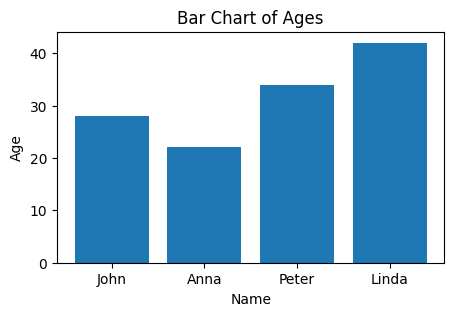

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Pandasを使ってデータフレームを作成し、表示
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 22, 34, 42]}
df = pd.DataFrame(data)
print("Pandas DataFrame:")
print(df)

# Matplotlibを使ってデータをプロット
plt.figure(figsize=(5, 3))
plt.bar(df['Name'], df['Age'])
plt.xlabel('Name')
plt.ylabel('Age')
plt.title('Bar Chart of Ages')
plt.show()


#### Scikit-learnのサンプルコード（Irisデータセットの読み込み）

In [3]:
from sklearn.datasets import load_iris

# Scikit-learnを使ってIrisデータセットをロードし、データの形状を表示
iris = load_iris()
X, y = iris.data, iris.target
print("Scikit-learn Iris dataset shape:")
print('Features:', X.shape, 'Labels:', y.shape)


Scikit-learn Iris dataset shape:
Features: (150, 4) Labels: (150,)


#### OpenCVのサンプルコード（画像の読み込み＆表示）

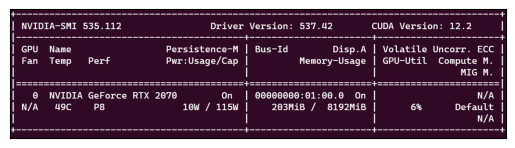

In [4]:
import matplotlib.pyplot as plt
import cv2

# OpenCVを使って画像ファイルから読み込み
img = cv2.imread('./images/nvidia_smi.png')
# OpenCVはBGR形式で画像を読み込むため、RGB形式に変換する
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# matplotlibを使って画像を表示
plt.imshow(img_rgb)
plt.xticks([])  # x軸の目盛りを非表示
plt.yticks([])  # y軸の目盛りを非表示
plt.show()


#### Pillowのサンプルコード（画像の読み込み＆表示）

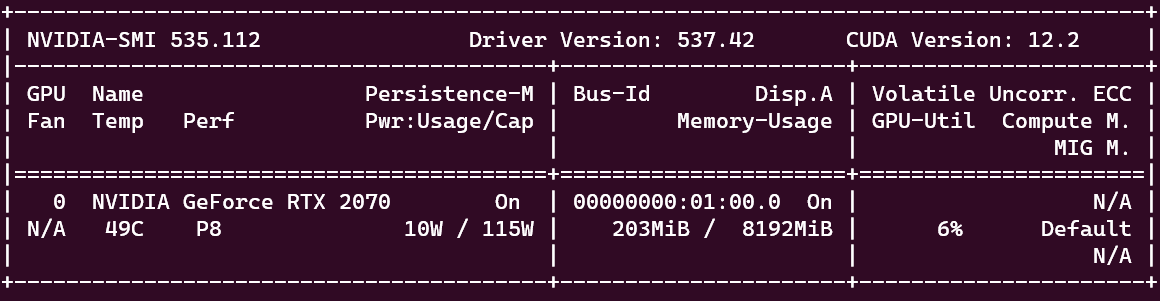

In [5]:
from PIL import Image
from IPython.display import display

# 画像ファイルを読み込む
img = Image.open('./images/nvidia_smi.png')

# 画像を表示（Jupyter Notebook内）
display(img)


#### SciPyのサンプルコード（信号処理）

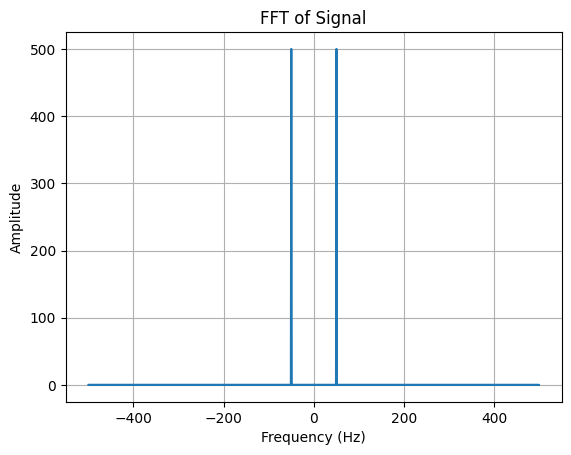

In [6]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# サンプルデータ: 1秒間に10Hzのサンプリングで作成したシグナル
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t)  # 50 Hzの正弦波

# 離散フーリエ変換を実行
yf = fft(signal)
xf = fftfreq(1000, 1 / 1000)  # 周波数ビンを計算

# 結果をプロット
plt.figure()
plt.plot(xf, np.abs(yf))
plt.title("FFT of Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


### MNISTのサンプルコード

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# データセットの前処理を定義
transform = transforms.Compose([
    transforms.ToTensor(),  # PIL Imageまたはnumpy.ndarrayをPyTorchのTensorに変換
    transforms.Normalize((0.5,), (0.5,))  # ピクセル値の正規化
])

# MNISTデータセットのダウンロードとロード
trainset = MNIST(root='./data', train=True, download=True, transform=transform)
testset = MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# ニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# GPUの確認と使用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using {device} device')

# モデル、損失関数、最適化手法の設定
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# モデルのトレーニング
def train(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# テストデータでモデルの評価
def test(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

# トレーニングとテストの実行
train(model, trainloader, criterion, optimizer)
test(model, testloader)


Using cuda device
Epoch 1, Loss: 0.2017010599374771
Epoch 2, Loss: 0.14960543811321259
Epoch 3, Loss: 0.06674208492040634
Epoch 4, Loss: 0.17954960465431213
Epoch 5, Loss: 0.04357731342315674
Accuracy: 97.23%
